In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [2]:
#read the dataset and print the first few rows using head function
df1 = pd.read_csv('Covid 19 Worldometer.csv')
df1.head(11)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
5,2020-04-18,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0
6,2020-04-18,France,65256826,463662.0,151793.0,19323.0,35983.0,5833.0,96487.0
7,2020-04-18,Germany,83752855,1728357.0,143724.0,4538.0,85400.0,2922.0,53786.0
8,2020-04-18,Turkey,84230075,598933.0,82329.0,1890.0,10453.0,1894.0,69986.0
9,2020-04-18,Iran,83862642,330137.0,80868.0,5031.0,55987.0,3513.0,19850.0


In [3]:
#Read age input
age=pd.read_csv('Covid 19 age str.csv')
age.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [4]:
#concating the files
df=pd.concat([df1,age])
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664.0,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,NaN,NaN,NaN
1,2020-04-18,Russia,145927292.0,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,NaN,NaN,NaN
2,2020-04-18,Spain,46752703.0,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,NaN,NaN,NaN
3,2020-04-18,Brazil,212380932.0,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,NaN,NaN,NaN
4,2020-04-18,UK,67844241.0,460437.0,114217.0,15464.0,NaN,1559.0,98409.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
208,NaN,St. Barth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,NaN,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,NaN,Lesotho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.354,0.601,0.045


In [5]:
df.shape
#print the number of rows and columns ie 6816 rows and 12 columns

(6816, 12)

In [6]:
df.dtypes
#lets check the types of data

Date                         object
Country                      object
Population                  float64
Total Tests                 float64
Total Cases                 float64
Total Deaths                float64
Total Recovered             float64
Serious or Critical         float64
Active Cases                float64
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

In [7]:
df.info()
#info function gives a concise summary of the dataframe; it tells us about the datatypes and non null values
#here there are 10 float and 2 object/string valued columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6816 entries, 0 to 212
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      6603 non-null   object 
 1   Country                   6816 non-null   object 
 2   Population                6603 non-null   float64
 3   Total Tests               5505 non-null   float64
 4   Total Cases               6554 non-null   float64
 5   Total Deaths              5367 non-null   float64
 6   Total Recovered           6318 non-null   float64
 7   Serious or Critical       4117 non-null   float64
 8   Active Cases              6544 non-null   float64
 9   Fraction age 0-14 years   176 non-null    float64
 10  Fraction age 15-64 years  176 non-null    float64
 11  Fraction age 65+ years    176 non-null    float64
dtypes: float64(10), object(2)
memory usage: 692.2+ KB


In [8]:
df.describe()
#it shows the statistical inference of the data

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03,176.000000,176.000000,176.000000
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03,0.276098,0.636109,0.087731
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04,0.106748,0.066543,0.062522
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.115000,0.472000,0.011000
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01,0.177000,0.596750,0.034000
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02,0.266500,0.649000,0.063500
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03,0.368250,0.675250,0.143250
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06,0.502000,0.850000,0.270000


#From the above statistical table we can understand: We can see that for each column we have the following functions

count- Number of non-null observations here all the columns contain 6.603000e+03 entries.

mean- Mean of Values here mean of each column is found ie, mean of Population column= 3.637913e+07	, Total Tests	 is 2.167252e+05	 etc

std- Standard Deviation of the Values here stnadard deviation for Population is 1.411537e+08, Total Tests	 is 7.595143e+05	 etc

min- Minimum value here it shows the min value Population is 8.010000e+02	 , for Total Tests	 is 1.000000e+01 etc

max- Maximum value it shows the max value for Population as 1.439324e+09 , for Total Tests	 is 1.230074e+07	 etc

25%, 50%, and 75% - IQR values it shows percentile values at 25%,50% and 75% ; for Population it is 8.672680e+05, 6.859926e+06	 and 2.546422e+07 respectively

In [9]:
df['Country'].value_counts()
#count the states

Armenia                  32
Paraguay                 32
Cameroon                 32
Saint Kitts and Nevis    32
Curaçao                  32
                         ..
Benin                    32
Nicaragua                32
Barbados                 32
Vatican City             32
Thailand                 32
Name: Country, Length: 213, dtype: int64

In [10]:
#As we can see there are no missing values
df.isin(['?']).sum(axis=0)

Date                        0
Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

In [11]:
#As we can see there are no missing values
df.isin(['NaN']).sum(axis=0)

Date                        0
Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

In [12]:
df.isnull().sum()
#check whether there is any null value

Date                         213
Country                        0
Population                   213
Total Tests                 1311
Total Cases                  262
Total Deaths                1449
Total Recovered              498
Serious or Critical         2699
Active Cases                 272
Fraction age 0-14 years     6640
Fraction age 15-64 years    6640
Fraction age 65+ years      6640
dtype: int64

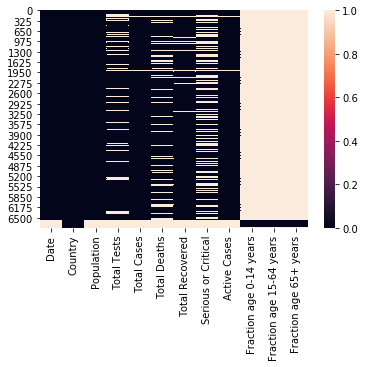

In [13]:
import seaborn as sns
sns.heatmap(df.isnull())

In [14]:
#lets fill the null values using for loop
for col in ['Date','Population','Total Recovered','Serious or Critical','Total Tests','Total Cases','Total Deaths','Active Cases','Fraction age 0-14 years','Fraction age 15-64 years','Fraction age 65+ years']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

Date                        0
Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

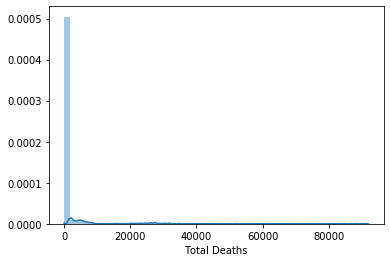

In [16]:
#lets use heatmap to plot each feature
import seaborn as sns
sns.distplot(df['Total Deaths'])

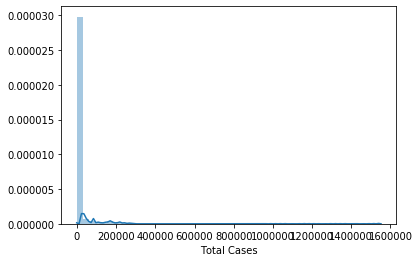

In [17]:
sns.distplot(df['Total Cases'])

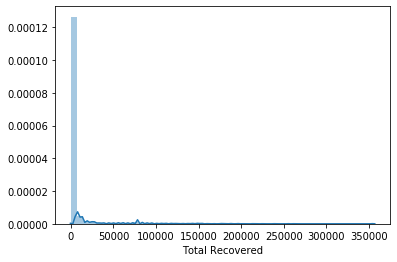

In [18]:
sns.distplot(df['Total Recovered'])

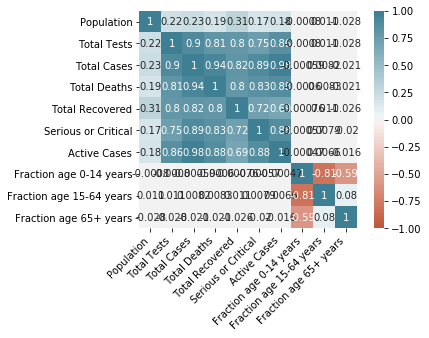

In [19]:
#correlation 
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

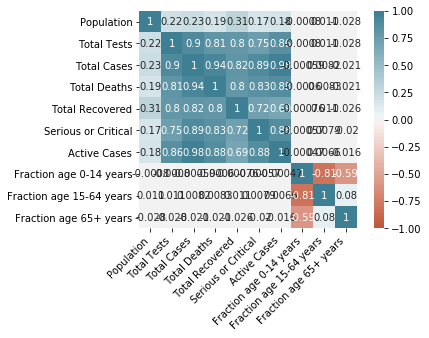

In [20]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [21]:
#splitting x and y variable
feature_cols=['Population','Total Cases','Total Recovered','Active Cases']
X = df[feature_cols]

In [28]:
y = df['Total Deaths']
y

0      39014.0
1        313.0
2      20043.0
3       2361.0
4      15464.0
        ...   
208        1.0
209        1.0
210        1.0
211        1.0
212        1.0
Name: Total Deaths, Length: 6816, dtype: float64

In [29]:

#Spliting the data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [30]:
X_test.shape

(1364, 4)

In [31]:
y_test.shape

(1364,)

In [32]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [33]:
y_test.shape

(1364,)

In [34]:
X_test.shape

(1364, 4)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures


In [36]:
#Model Prediction

#We can see that the dataset is continuous in nature and hence Linear Regression is apt here.

#Using sklearns linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
linear_regression_score = regressor.score(X_test, y_test)
print("Linear Regression Score:", linear_regression_score)

Linear Regression Score: 0.8828150718556205


In [37]:
#Using sklearns Decision tree regressor model
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
tree_score = regressor.score(X_test, y_test)
print("DT Score:", regressor.score(X_test, y_test))

DT Score: 0.9988899532652814


In [38]:
#Using sklearns Random forest regressor model 
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
forest_score = regressor.score(X_test, y_test)
print("RF Score:", regressor.score(X_test, y_test))

RF Score: 0.9968304754611753


In [39]:
#Using plynomial regression using polynomial features
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
poly_score = regressor.score(poly_reg.transform(X_test), y_test)
print("Poly Score:", regressor.score(poly_reg.transform(X_test), y_test))

Poly Score: 0.33919596952813413


In [40]:
#we can see that the decison tree regression gives us the highest accuracy score which is 99.83%. Hence I chose Decision Tree for the best model.

In [64]:
#lets save the final model
from sklearn.externals import joblib

#save the model as pickle in a file
joblib.dump(DecisionTreeRegressor,'Model Covid 19 worldwise.pkl')

['Model Covid 19 worldwise.pkl']